In [1]:

# This is lzl's snippet for diploma project
import math
import os,shutil
import random
import warnings
import gc
import joypy

import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapely
import seaborn as sns
from shapely.geometry import LineString, Point, Polygon
from shapely.wkt import dumps, loads
from tqdm import tqdm

import traProject as tp
from traProject.analysisFuns import statisticFuns as sfun
from traProject.basicFuns import CalFuns as cfun,VisFuns as vfun,DataProcessingFuns as dfun
from traProject.classificationFuns import model_feature_selection as mfs
import traProject.utils as tu

random.seed(1229)

# plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

warnings.filterwarnings("ignore")

picOut='../../output/pic/paper/'


# 筛选大数据量样本

In [10]:
VERSION=2
VELOCITY='velocity'

In [11]:
wlist=pd.read_csv('../../output/paper/wrongSample/wlist.csv',index_col=0)
wids=wlist['0'].to_list()

In [12]:
path0=tu.getFileNames('../../output/paper/tra_linkid/tra_link_id_v%s_Pts_minN=50_bufR=1e-05_dropWifi=False_velocity=%s/'%(VERSION,VELOCITY))
ratio=0.2
file_dir='../../output/paper/goodSample/'
if os.path.exists(file_dir):
    shutil.rmtree(file_dir)
for p0 in tqdm(path0):
    path1=tu.getFilesBySize(p0+'/')
    all_len=len(path1)
    end_index=int(all_len*ratio)
    for idx in range(end_index+1):
        p1=path1[idx]
        tmpstr=p1.split('/')
        pathstr=tmpstr[-2]
        fname=tmpstr[-1]
        linkid=fname.split('.')[0]
        if linkid in wids:
            continue
        file_dir1=file_dir+pathstr+'/'
        dst_path=tu.pathCheck(file_dir1)+fname
        shutil.copyfile(p1, dst_path)

100%|██████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.08it/s]


In [13]:
paths=tu.scan_files('../../output/paper/goodSample/')
gids=[]
for p in paths:
    gid=p.split('\\')[1].split('.')[0]
    gids.append(gid)

In [14]:
versionList=[VERSION]
PtsOrTraList=['Pts','Tra']
velocityNameList=[VELOCITY]
dropViaductList=[True,False]
dropWifiList=[True,False]

PtsOrTra='Pts'
dropViaduct=True
dropWifi=True
percentList=[0.5]
vTopNModeList=['1_0.5']
vTopNModeList.extend('2_%s'%i for i in percentList)

outfile='../../output/paper/FE1/'
if os.path.exists(outfile):
    shutil.rmtree(outfile)
    
for version in versionList:
    sname='speed%s'%version
    for vTopNModestr in vTopNModeList:
        vTopNMode=int(vTopNModestr.split('_')[0])
        percent=float(vTopNModestr.split('_')[1])
        for velocityName in velocityNameList:
            versionName='%s_dropViaduct=%s_dropWifi=%s_vTopNmode=%s_velocity=%s'%(sname,dropViaduct,dropWifi,vTopNModestr,velocityName)
            fatherfiles=tu.getFileNames('../../output/paper/goodSample/')
            for fa in tqdm(fatherfiles):
                files=tu.getFileNames(fa+'/')
                for file in files:
                    tu.genDataSet1(file,
                                '../../output/paper/wuhan_road/WUHAN_new.csv',
                                outfile=tu.pathCheck(outfile),
                                speedName=sname,
                                dname='tra_%s'%(versionName),
                                attrNames=['Sdis','Xdis','RC','viaduct'],
                                minPNum=50,
                                dropViaduct=dropViaduct,   
                                dropWifi=dropWifi,
                                vTopNMode=vTopNMode,
                                percent=percent
                                )

100%|██████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:36<00:00,  5.25s/it]


Now tuning Random Forest. Go grab a beer or something.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 feat

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


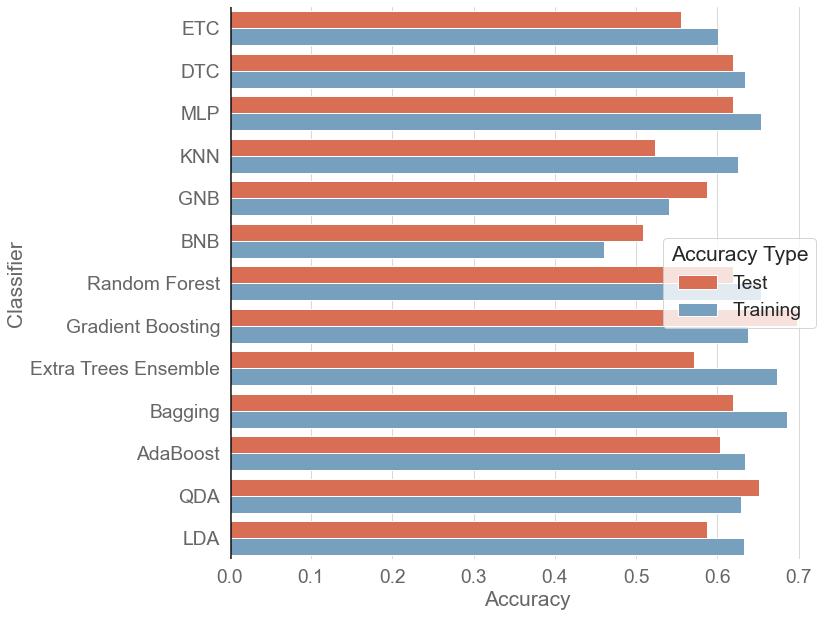

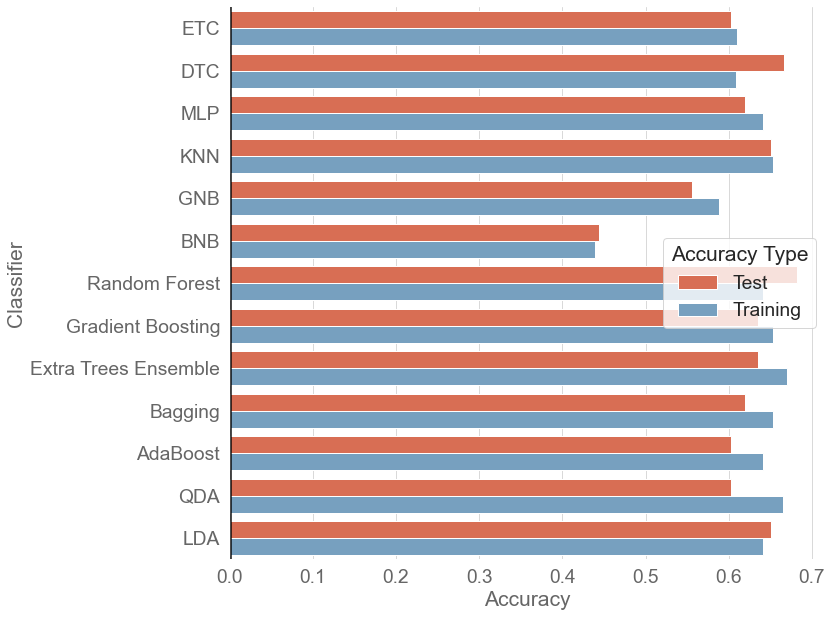

In [15]:
modelpath='../../output/paper/models1/'
if os.path.exists(modelpath):
    shutil.rmtree(modelpath)
mfs.main('../../output/paper/FE1/',modelpath)

通过筛选数据量充足的样本进行实验，但是分类效果依然不佳，应当是数据本身和特征工程的问题

# 特征实验

In [4]:
fe=pd.read_csv('../../output/paper/FE1/tra_speed2_dropViaduct=True_dropWifi=True_vTopNmode=1_0.5_velocity=velocity.csv')
fe

,linkID,maxspeed,pNum,VTop0,VTop1,VTop2,VTop3,VTop4,VTop5,VTop6,...,V75,V80,V85,V90,V95,V100,Vmode,Sdis,Xdis,RC
0,104107458-1,20,1222,20.650644,20.443019,20.145853,19.719432,19.679285,18.750706,18.359446,...,24.736806,26.422881,28.019013,30.183831,33.043782,39.891090,22,0.002263,0.002262,1.000193
1,104107458-3,20,781,18.476148,17.820349,17.709588,17.291479,16.686125,15.720974,NaN,...,21.233970,22.097834,23.513760,24.819840,27.058275,39.495951,14,0.001267,0.001267,1.000000
2,104107458-4,20,723,14.722914,13.969671,13.646492,12.904075,NaN,NaN,NaN,...,16.400673,17.211734,18.381347,20.090015,22.311396,34.369164,11,0.001643,0.001643,1.000000
3,177612002-13,20,771,21.407883,20.794876,18.696151,16.795088,NaN,NaN,NaN,...,23.250004,24.748704,25.938900,28.144737,30.665880,37.096200,20,0.001469,0.001440,1.020304
4,231778177-5,20,894,20.982748,20.851571,20.614748,19.710911,19.611932,18.086510,18.029193,...,23.187351,24.409305,25.754968,27.783985,31.079992,40.818780,20,0.000987,0.000987,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,98985382-2,80,1708,64.818235,62.378008,61.512955,60.743956,60.611360,59.890355,59.546276,...,65.746044,67.794840,69.273488,71.540974,75.259800,90.542880,58,0.005458,0.005456,1.000365
448,98987537-1,80,1423,72.907962,69.914707,69.712208,68.992581,68.894344,67.792043,67.647494,...,74.241197,75.856694,77.181690,79.379046,82.618526,95.450560,69,0.030031,0.030019,1.000405
449,98987539-3,80,8639,68.056735,65.746406,62.673402,62.545705,62.368538,62.243078,61.482616,...,66.067042,68.126925,69.990506,72.635832,76.041977,93.140280,58,0.035192,0.034692,1.014404
450,99329049-1,80,3166,66.466495,63.939521,63.899674,61.964524,61.464541,60.856951,60.019864,...,67.203864,68.705213,70.287048,72.415431,75.538513,96.500640,58,0.013908,0.013908,1.000009


In [23]:
# fe['Vprob']=int((fe['VTop0']+5)/10)*10
fe

,linkID,maxspeed,pNum,VTop0,VTop1,VTop2,VTop3,VTop4,VTop5,VTop6,...,V80,V85,V90,V95,V100,Vmode,Sdis,Xdis,RC,Vprob
0,104107458-1,20,1222,20.650644,20.443019,20.145853,19.719432,19.679285,18.750706,18.359446,...,26.422881,28.019013,30.183831,33.043782,39.891090,22,0.002263,0.002262,1.000193,20
1,104107458-3,20,781,18.476148,17.820349,17.709588,17.291479,16.686125,15.720974,NaN,...,22.097834,23.513760,24.819840,27.058275,39.495951,14,0.001267,0.001267,1.000000,20
2,104107458-4,20,723,14.722914,13.969671,13.646492,12.904075,NaN,NaN,NaN,...,17.211734,18.381347,20.090015,22.311396,34.369164,11,0.001643,0.001643,1.000000,10
3,177612002-13,20,771,21.407883,20.794876,18.696151,16.795088,NaN,NaN,NaN,...,24.748704,25.938900,28.144737,30.665880,37.096200,20,0.001469,0.001440,1.020304,20
4,231778177-5,20,894,20.982748,20.851571,20.614748,19.710911,19.611932,18.086510,18.029193,...,24.409305,25.754968,27.783985,31.079992,40.818780,20,0.000987,0.000987,1.000000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,98985382-2,80,1708,64.818235,62.378008,61.512955,60.743956,60.611360,59.890355,59.546276,...,67.794840,69.273488,71.540974,75.259800,90.542880,58,0.005458,0.005456,1.000365,60
448,98987537-1,80,1423,72.907962,69.914707,69.712208,68.992581,68.894344,67.792043,67.647494,...,75.856694,77.181690,79.379046,82.618526,95.450560,69,0.030031,0.030019,1.000405,70
449,98987539-3,80,8639,68.056735,65.746406,62.673402,62.545705,62.368538,62.243078,61.482616,...,68.126925,69.990506,72.635832,76.041977,93.140280,58,0.035192,0.034692,1.014404,60
450,99329049-1,80,3166,66.466495,63.939521,63.899674,61.964524,61.464541,60.856951,60.019864,...,68.705213,70.287048,72.415431,75.538513,96.500640,58,0.013908,0.013908,1.000009,60


<Figure size 1280x800 with 0 Axes>

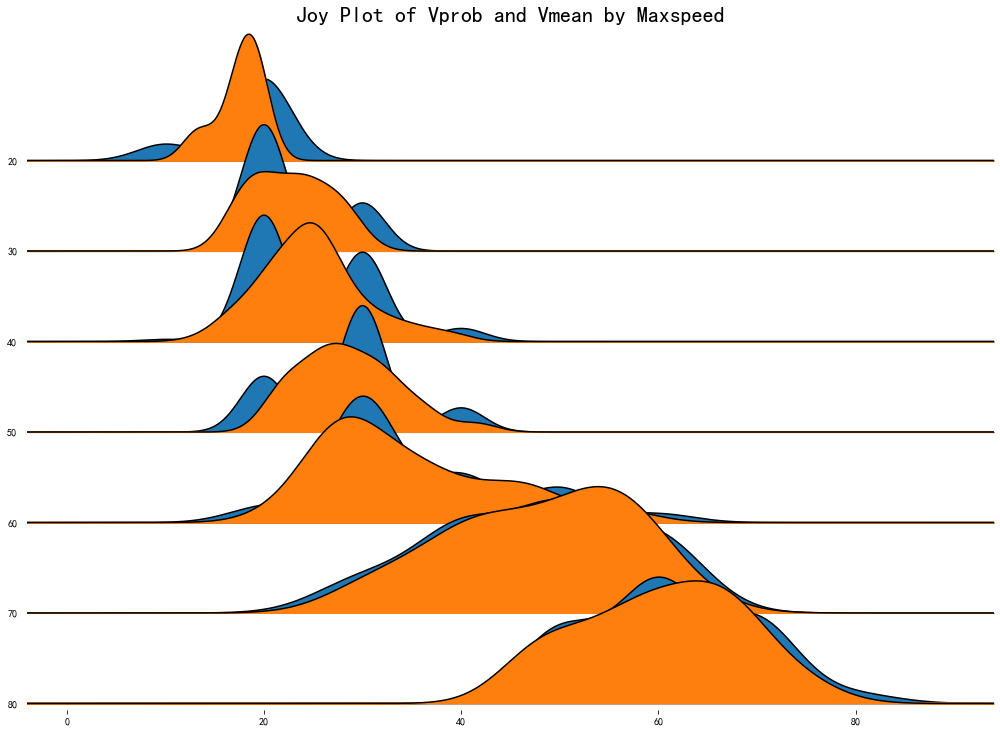

In [26]:
# Draw Plot
fe['Vprob']=fe['Vmean'].apply(lambda x:int((x+5)/10)*10)
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(fe, column=['Vprob','Vmean'],by="maxspeed", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of Vprob and Vmean by Maxspeed', fontsize=22)
plt.show()

<Figure size 1280x800 with 0 Axes>

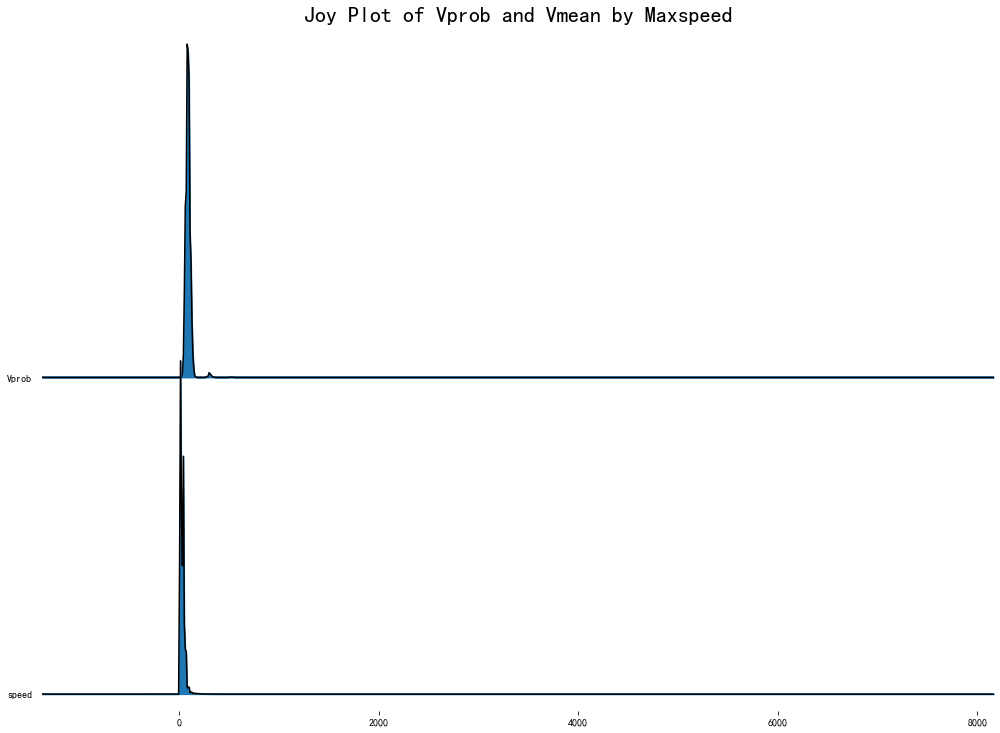

In [3]:
speedName='speed'
data_all['Vprob']=data_all[speedName].apply(lambda x:int((x+5)/10)*10)
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(data_all, column=['Vprob',speedName],ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of Vprob and Vmean by Maxspeed', fontsize=22)
plt.show()

In [10]:
data=pd.read_csv('../../output/paper/wuhan_all/tra_all_link.csv')
data

,pid,tid,fid,lon,lat,timestamp,speed,type,acc,bearing,heading,hour,month,day,velocity,velocity1,maxspeed,link_id
0,5,1396,3730,114.342536,30.530427,1564399306,39.6,0,6,109.0,1,19,7,29,31.924989,-9999.000000,50,100305699-4
1,2,1116,7196,114.342394,30.530467,1564096290,36.0,0,11,106.0,1,7,7,26,27.663032,30.571280,50,100305699-4
2,1,6158,8675,114.343070,30.530276,1564359798,0.0,0,51,272.0,1,8,7,29,10.174832,9.316713,50,100305699-4
3,2,6158,8675,114.343070,30.530276,1564359805,0.0,0,55,186.0,1,8,7,29,0.000000,11.028816,50,100305699-4
4,107,3586,10848,114.343030,30.530287,1564416301,32.4,0,7,108.0,1,0,7,30,14.765621,23.507096,50,100305699-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258833,34,745,1725892,114.424113,30.520810,1564363808,21.6,0,24,113.0,1,9,7,29,30.295457,-9999.000000,20,99495585-3
4258834,3,3102,1788012,114.422344,30.520951,1564403069,18.0,0,128,0.0,1,20,7,29,27.030060,26.361936,20,99495585-3
4258835,4,3102,1788012,114.422481,30.520958,1564403071,21.6,0,128,0.0,1,20,7,29,23.689440,26.630550,20,99495585-3
4258836,5,3102,1788012,114.422310,30.520949,1564403073,14.4,0,64,0.0,0,20,7,29,29.571660,15.151536,20,99495585-3


<Figure size 1280x800 with 0 Axes>

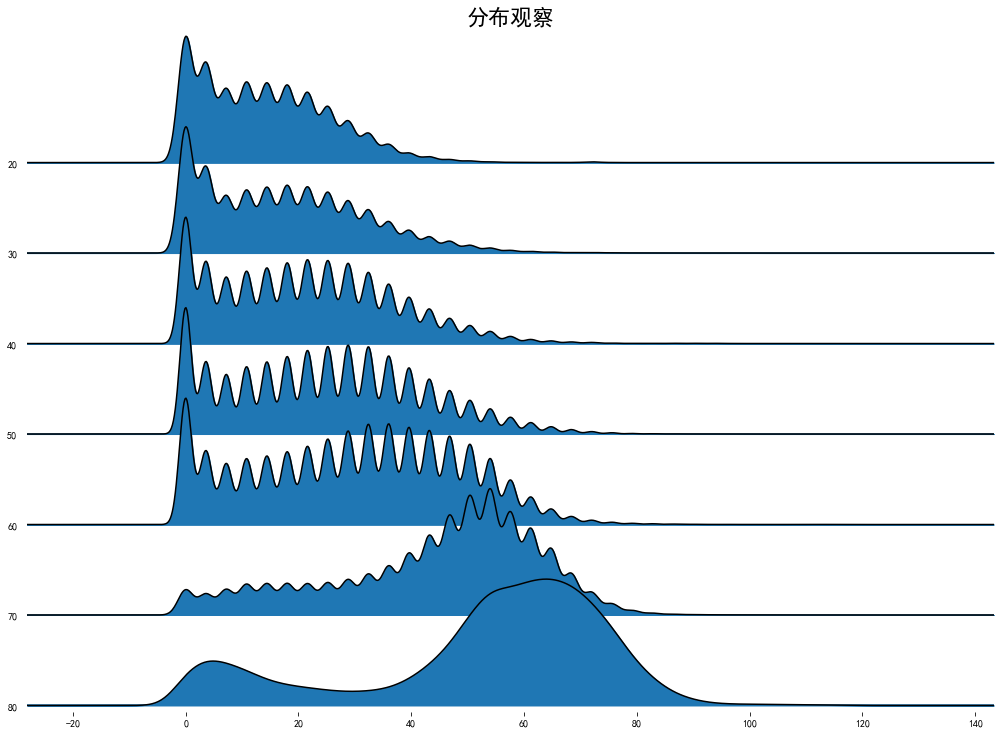

In [21]:
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(data[(data.type==0)&(data.speed<=120)], column=['speed'],by="maxspeed", ylim='own', figsize=(14,10))

# Decoration
plt.title('分布观察', fontsize=22)
plt.show()